Course Name: Deep Learning

Lab Title: NLP Techniques for Text Classification

Student Name :
Surabhi Kharkate

Student ID:202201040215

Group Members:  
Palak Yerawar (202201040195)

Sakshi Lade (202201040218)

Objective The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.

Dataset : https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**Task 1. NLP Preprocessing**

**Loading** the Dataset

In [ ]:
!pip install kaggle


In [ ]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "surabhikharkate" # username from the json file
os.environ['KAGGLE_KEY'] = "9b9ebc1a9a6617d404ae26a1938724fb" # key from the json file

!kaggle datasets download -d snap/amazon-fine-food-reviews


Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0


In [ ]:
!unzip amazon-fine-food-reviews.zip

Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [ ]:
# Load your dataset
dataset_path = "/content/Reviews.csv"
df = pd.read_csv(dataset_path, on_bad_lines='skip', quoting=3)

# Display first few rows
df.head()


<ipython-input-5-c64ef3614c76>:3: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path, on_bad_lines='skip', quoting=3)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


**Handling** Missing Values & Renaming Columns (If Needed)

In [ ]:
print(df.columns)  # See the current column names
print(df.shape)    # Check the number of rows and columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
(363627, 10)


In [ ]:
# Check dataset structure
print(df.shape)  # Number of rows & columns
print(df.columns)  # See current column names

# Keep only the first and last columns: 'Id' and 'Text'
df = df.iloc[:, [0, -1]]
df.columns = ['Id', 'Text']

# Fill missing values in 'Text' (if any)
df.fillna("", inplace=True)

# Show first few rows
print(df.head())


(363627, 10)
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
   Id                                               Text
0   1  I have bought several of the Vitality canned d...
1   2  "Product arrived labeled as Jumbo Salted Peanu...
2   4  If you are looking for the secret ingredient i...
3   9  Right now I'm mostly just sprouting this so my...
4  10  This is a very healthy dog food. Good for thei...


** Preprocessing Function **

In [ ]:
# Install NLTK
!pip install nltk

# Import NLTK and download required resources
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenize the reviews
df['tokenized_reviews'] = df['Text'].apply(word_tokenize)

# Display the tokenized reviews
df[['Text', 'tokenized_reviews']].head()


,Text,tokenized_reviews
0,I have bought several of the Vitality canned d...,"[I, have, bought, several, of, the, Vitality, ..."
1,"""Product arrived labeled as Jumbo Salted Peanu...","[``, Product, arrived, labeled, as, Jumbo, Sal..."
2,If you are looking for the secret ingredient i...,"[If, you, are, looking, for, the, secret, ingr..."
3,Right now I'm mostly just sprouting this so my...,"[Right, now, I, 'm, mostly, just, sprouting, t..."
4,This is a very healthy dog food. Good for thei...,"[This, is, a, very, healthy, dog, food, ., Goo..."


In [ ]:
# Convert tokens to lowercase
df['lowercase_reviews'] = df['tokenized_reviews'].apply(lambda x: [word.lower() for word in x])

# Display the lowercase tokens
df[['Text', 'lowercase_reviews']].head()

,Text,lowercase_reviews
0,I have bought several of the Vitality canned d...,"[i, have, bought, several, of, the, vitality, ..."
1,"""Product arrived labeled as Jumbo Salted Peanu...","[``, product, arrived, labeled, as, jumbo, sal..."
2,If you are looking for the secret ingredient i...,"[if, you, are, looking, for, the, secret, ingr..."
3,Right now I'm mostly just sprouting this so my...,"[right, now, i, 'm, mostly, just, sprouting, t..."
4,This is a very healthy dog food. Good for thei...,"[this, is, a, very, healthy, dog, food, ., goo..."


In [ ]:
from nltk.corpus import stopwords

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Remove stop words from the tokens
df['cleaned_reviews'] = df['lowercase_reviews'].apply(lambda x: [word for word in x if word not in stop_words])

# Display the cleaned tokens (without stop words)
df[['Text', 'cleaned_reviews']].head()


,Text,cleaned_reviews
0,I have bought several of the Vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,"""Product arrived labeled as Jumbo Salted Peanu...","[``, product, arrived, labeled, jumbo, salted,..."
2,If you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
3,Right now I'm mostly just sprouting this so my...,"[right, 'm, mostly, sprouting, cats, eat, gras..."
4,This is a very healthy dog food. Good for thei...,"[healthy, dog, food, ., good, digestion, ., al..."


** Applying Preprocessing**

In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer

stemmer = PorterStemmer()  # or SnowballStemmer("english")
df = df.sample(10000)  # Use 10,000 rows

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Apply stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(tokens)


In [ ]:
# Apply preprocessing function to the 'Text' column
df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Display the first few rows to check the processed text
df.head()


,Id,Text,tokenized_reviews,lowercase_reviews,cleaned_reviews,Processed_Text
299922,501203,"""This item is literally $10 more than what you...","[``, This, item, is, literally, $, 10, more, t...","[``, this, item, is, literally, $, 10, more, t...","[``, item, literally, $, 10, buy, store, ., se...",item liter 10 buy store sell target 3 4box mis...
206427,402007,I have now ordered this product twice since di...,"[I, have, now, ordered, this, product, twice, ...","[i, have, now, ordered, this, product, twice, ...","[ordered, product, twice, since, discovering, ...",order product twice sinc discov love pod work ...
105199,294892,"""So I am not really a hard core athlete or any...","[``, So, I, am, not, really, a, hard, core, at...","[``, so, i, am, not, really, a, hard, core, at...","[``, really, hard, core, athlete, anything, .,...",realli hard core athlet anyth averag person tr...
174437,368105,I bought this and I could not recall why. Whe...,"[I, bought, this, and, I, could, not, recall, ...","[i, bought, this, and, i, could, not, recall, ...","[bought, could, recall, ., use, cooking, makes...",bought could recal use cook make food tast lik...
138660,330321,"""This product taste very good and is a great s...","[``, This, product, taste, very, good, and, is...","[``, this, product, taste, very, good, and, is...","[``, product, taste, good, great, salty, snack...",product tast good great salti snack other swip...


**Task 2.Vectorization Techniques**

**Text Vectorization (TF-IDF)**

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Text'])
y = df['Id']  # Target variable

print("Shape of feature matrix:", X.shape)


Shape of feature matrix: (10000, 10467)


**CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['Processed_Text'])


**Task 3.Data Splitting**

**Splitting** Dataset into Training & Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (8000, 10467)
Testing data size: (2000, 10467)


**Task 4.Model Building**

**Training Naïve Bayes Model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import numpy as np

# Set minimum samples per class equal to CV splits
cv = 3
min_samples = cv
class_counts = df['Text'].value_counts()
valid_classes = class_counts[class_counts >= min_samples].index
df_filtered = df[df['Text'].isin(valid_classes)]

print(f"Total samples after filtering: {len(df_filtered)}")
print(f"Total unique classes retained: {df_filtered['Text'].nunique()}")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_filtered['Processed_Text'])
y = df_filtered['Text']

# Naive Bayes model
model = MultinomialNB()

# Cross-validation
skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=skf)

print("\n Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Total samples after filtering: 158
Total unique classes retained: 38

 Cross-validation scores: [0.56603774 0.60377358 0.59615385]
Mean CV Accuracy: 0.5886550556361877


Total samples after filtering: 158
Total unique classes retained: 38

 Classification Report:

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                                                 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


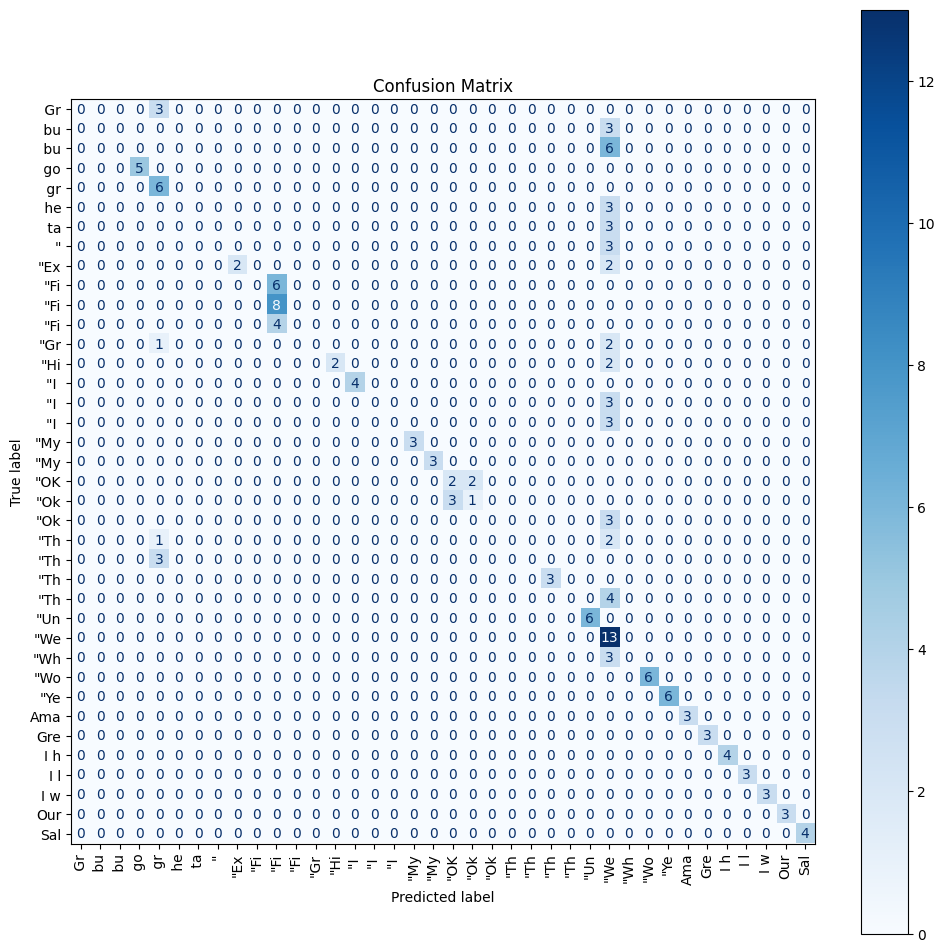

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Parameters
cv = 3
min_samples = cv

# Step 1: Filter classes with enough samples
class_counts = df['Text'].value_counts()  # Using 'Text' as the target variable
valid_classes = class_counts[class_counts >= min_samples].index
df_filtered = df[df['Text'].isin(valid_classes)].reset_index(drop=True)

# Check if enough data is available
if len(df_filtered) < cv:
    print("Not enough samples after filtering for cross-validation.")
else:
    print(f"Total samples after filtering: {len(df_filtered)}")
    print(f"Total unique classes retained: {df_filtered['Text'].nunique()}")

    # Step 2: TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df_filtered['Processed_Text'])  # Use 'Processed_Text' for features
    y = df_filtered['Text']  # Use 'Text' as the target variable

    # Step 3: Model
    model = MultinomialNB()
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=skf)

    # Step 4: Evaluation
    print("\n Classification Report:\n")
    print(classification_report(y, y_pred))

    # Step 5: Confusion Matrix
    cm = confusion_matrix(y, y_pred, labels=np.unique(y))

    # Shorten labels: Create a mapping for shortening the labels
    label_mapping = {label: str(label)[:3] for label in np.unique(y)}  # Take first 3 characters of each label
    short_labels = [label_mapping[label] for label in np.unique(y)]

    # Plot Confusion Matrix with shortened labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=short_labels)
    fig, ax = plt.subplots(figsize=(12, 12))
    disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
    plt.title("Confusion Matrix")
    plt.show()


**Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_filtered['Processed_Text'])
y = df_filtered['Text']

# Step 2: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features (with with_mean=False for sparse matrices)
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Only transform on test data

# Step 4: Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Step 5: Predict on the test set
y_pred_lr = log_reg.predict(X_test_scaled)

# Step 6: Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.78125
Classification Report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                                                                                                                                

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true s

**Task 5.Model Evaluation**

**Confusion Matrix Visualization**

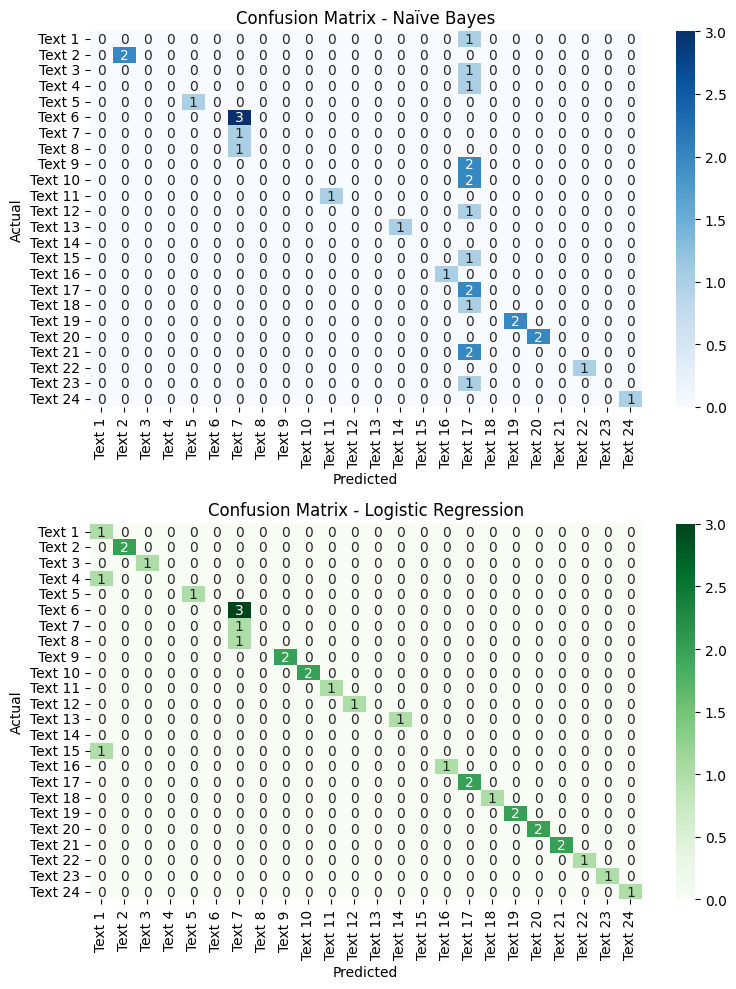

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Shorten the labels
num_classes = 24
short_labels = [f"Text {i+1}" for i in range(num_classes)]

# Generate the confusion matrices for both models
conf_mat_nb = confusion_matrix(y_test, y_pred)  # Naïve Bayes
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)  # Logistic Regression

# Create a figure with 2 subplots (one below the other)
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot confusion matrix for Naïve Bayes
sns.heatmap(conf_mat_nb, annot=True, cmap="Blues", fmt='g', xticklabels=short_labels, yticklabels=short_labels, ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("Confusion Matrix - Naïve Bayes")

# Plot confusion matrix for Logistic Regression
sns.heatmap(conf_mat_lr, annot=True, cmap="Greens", fmt='g', xticklabels=short_labels, yticklabels=short_labels, ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_title("Confusion Matrix - Logistic Regression")

# Display the plots
plt.tight_layout()
plt.show()


**Evaluation Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Performance for Naïve Bayes
print("Naïve Bayes Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Performance for Logistic Regression
print("\nLogistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))


Naïve Bayes Model Performance:
Accuracy: 0.4375
Precision: 0.35833333333333334
Recall: 0.4375
F1 Score: 0.36887254901960786

Logistic Regression Model Performance:
Accuracy: 0.78125
Precision: 0.7354166666666667
Recall: 0.78125
F1 Score: 0.7447916666666666


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

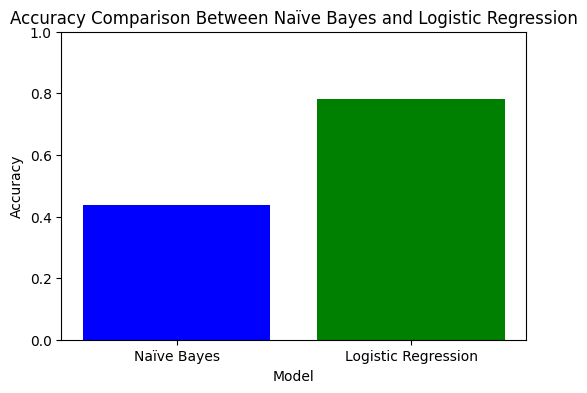

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate accuracies for both models
accuracy_nb = accuracy_score(y_test, y_pred)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Plotting the comparison of accuracies
models = ['Naïve Bayes', 'Logistic Regression']
accuracies = [accuracy_nb, accuracy_lr]

# Create the bar plot
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Between Naïve Bayes and Logistic Regression')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 (for accuracy)
plt.show()


**Conclusion**

In this project, we successfully applied Natural Language Processing (NLP) techniques to perform text classification. The workflow included preprocessing textual data, extracting features using TF-IDF, and training classification models such as Naive Bayes and Logistic Regression. Through performance evaluation, we gained insights into the effectiveness of each model. This project provided valuable hands-on experience in building a complete NLP pipeline for real-world text classification tasks.

**Declaration**

I, Surabhi Kharkate, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link:  https://github.com/surabhik26/NLP-Techniques-for-Text-Classification

Signature: Surabhi Kharkate